<a href="https://colab.research.google.com/github/SherlyDwiPuspita/Tugas-Machine-Learning/blob/main/Tugas_1_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
cancer = pd.read_csv ('/cancer.csv')

In [55]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [56]:
cancer.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [57]:
# Menyediakan daftar nama kolom yang ingin dihapus
columns_to_drop = ['id', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

# Melakukan penghapusan kolom menggunakan drop() dengan menyertakan parameter axis=1
cancer.drop(columns_to_drop, axis=1, inplace=True)

In [58]:
cancer.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [59]:
x = cancer[['radius_mean',	'texture_mean',	'perimeter_mean',	'area_mean',	'smoothness_mean',	'compactness_mean',	'concavity_mean',	'concave points_mean',	'symmetry_mean',	'fractal_dimension_mean']]
y = cancer['diagnosis']

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.1, random_state=123)

In [61]:
from sklearn.preprocessing import Normalizer

# Inisialisasi Normalizer
scaler = Normalizer()

# Ambil kolom yang akan dinormalisasi
columns_to_normalize = x_train.columns[0:]

# Normalisasi fit-transform pada data latih
x_train[columns_to_normalize] = scaler.fit_transform(x_train[columns_to_normalize])

# Normalisasi transform pada data uji (tanpa fit)
x_test[columns_to_normalize] = scaler.transform(x_test[columns_to_normalize])

In [62]:
print(x_test)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
333     0.028344      0.037237        0.179838   0.982582         0.000209   
273     0.032810      0.052774        0.207123   0.976339         0.000304   
201     0.018292      0.020148        0.120035   0.992397         0.000094   
178     0.024392      0.041659        0.153758   0.986929         0.000117   
85      0.017059      0.017115        0.111910   0.993424         0.000091   
500     0.021584      0.024024        0.141691   0.989384         0.000142   
216     0.027047      0.041742        0.175885   0.983153         0.000213   
297     0.026843      0.041405        0.171190   0.984001         0.000228   
209     0.020850      0.017627        0.134042   0.990599         0.000112   
469     0.027904      0.043656        0.183415   0.981669         0.000282   
270     0.022349      0.026306        0.141228   0.989375         0.000101   
335     0.018428      0.022684        0.120764   0.992251       

In [63]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

tree_model = tree_model.fit(x_train, y_train)

In [64]:
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(x_test)

acc_score = round(accuracy_score(y_pred, y_test), 3)

print('accuracy:', acc_score)

accuracy: 0.912


In [65]:
# Membuat prediksi menggunakan model tree_model
predictions = tree_model.predict(x_test)


In [66]:
from sklearn.tree import export_graphviz

export_graphviz(tree_model,
                out_file="cancer_eda.dot",
                feature_names=['radius_mean',	'texture_mean',	'perimeter_mean',	'area_mean',	'smoothness_mean',	'compactness_mean',	'concavity_mean',	'concave points_mean',	'symmetry_mean',	'fractal_dimension_mean'],
                class_names=['M','B'],
                rounded=True,
                filled=True)

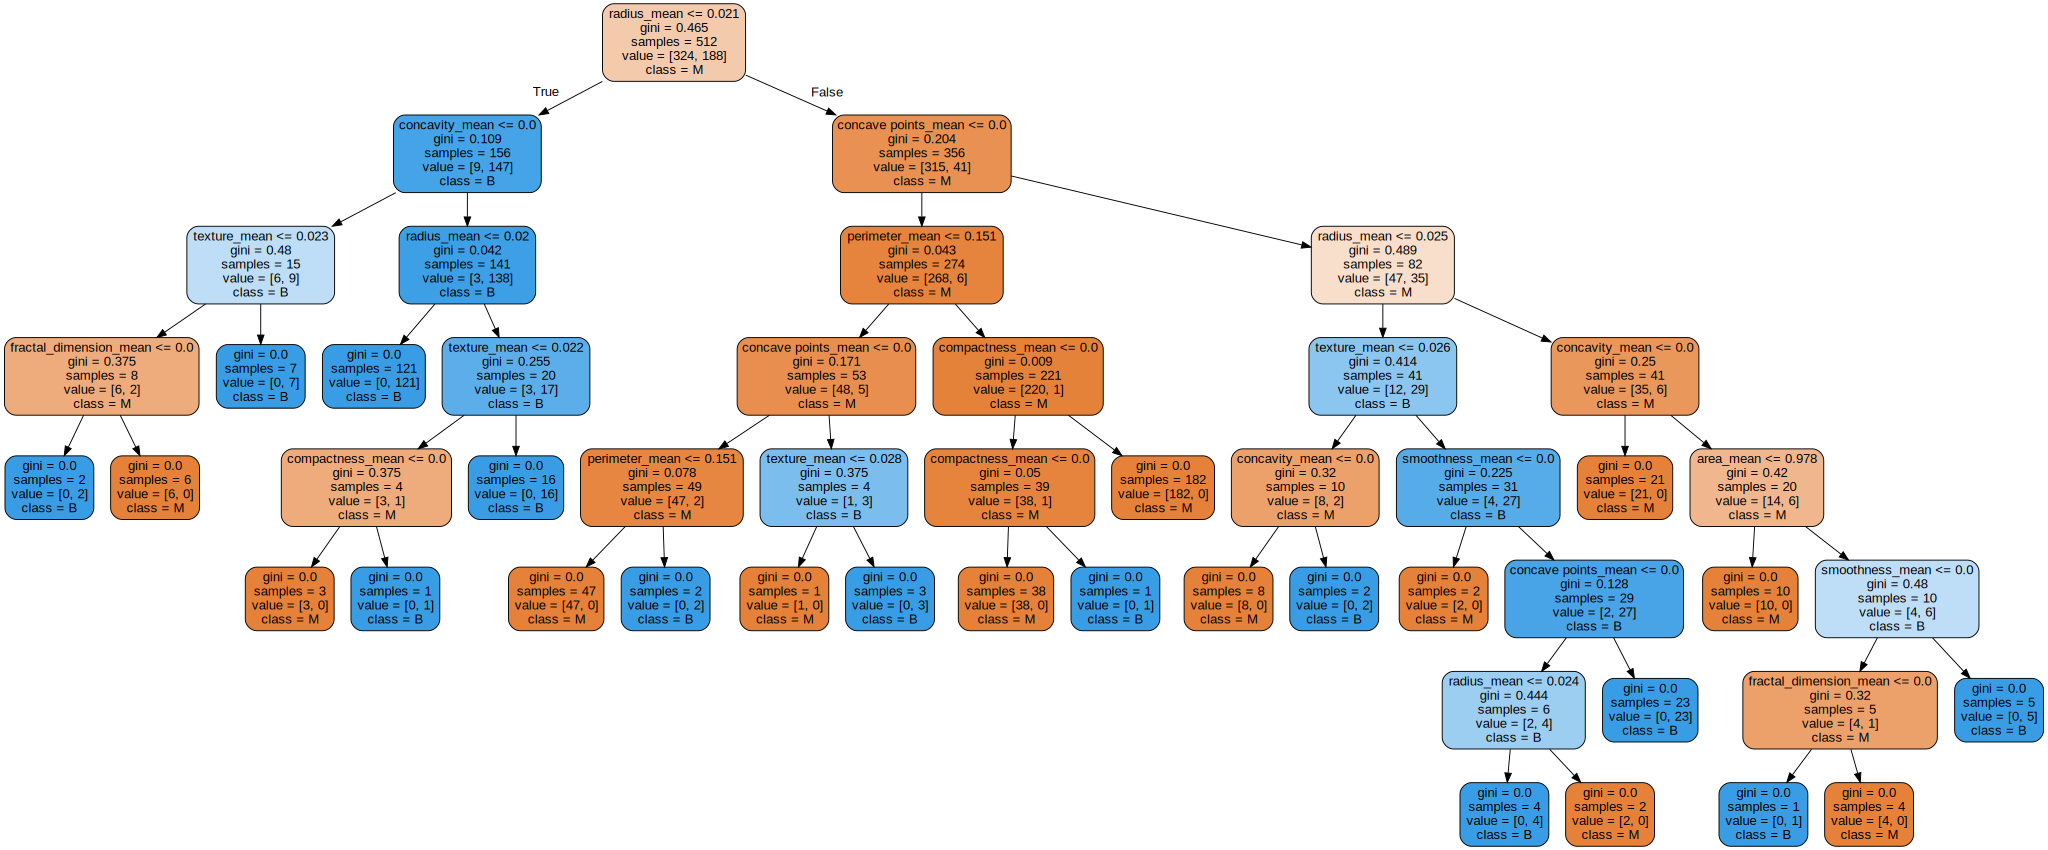

In [67]:
import graphviz
with open("cancer_eda.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [68]:
graph = graphviz.Source(dot_graph)
graph.render(filename='decision_tree', format='png', cleanup=True)

'decision_tree.png'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')